In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
images = '/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/train'

In [21]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [27]:
folders = os.listdir(images)
print(folders)

['NORMAL', 'PNEUMONIA']


In [28]:
image_data = []
labels = []

In [29]:
label_dict = {
    'PNEUMONIA':0,
    'NORMAL':1   
}

In [30]:
from keras.preprocessing import image

for ix in folders:
    path = os.path.join(images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size=((224,224)))
        img_array = image.img_to_array(img)
        image_data.append(img_array)
        labels.append(label_dict[ix])

In [31]:
print(len(image_data),len(labels))

510 510


In [32]:
import random
combined = list(zip(image_data,labels))
random.shuffle(combined)
image_data[:],labels[:]=zip(*combined)

In [33]:
print(labels)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 

In [34]:
x_train = np.array(image_data)
y_train = np.array(labels)

print(x_train.shape,y_train.shape)

(510, 224, 224, 3) (510,)


In [35]:
from keras.utils import np_utils

y_train = np_utils.to_categorical(y_train)
print(x_train.shape,y_train.shape)

(510, 224, 224, 3) (510, 2)


In [36]:
from keras.preprocessing.image import ImageDataGenerator

In [37]:
augment = ImageDataGenerator( 
                              rotation_range=20,
                              width_shift_range=0.01, 
                              height_shift_range=0.01, 
                              horizontal_flip=False, 
                              vertical_flip=False,
                            )
augment.fit(x_train)

In [38]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [39]:
model = Sequential()


model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=(224,224,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(224,224,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224,224,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(224,224,3), activation='relu',kernel_regularizer=l2(0.01)))
model.add(MaxPool2D(pool_size=(2, 2)))


model.add(Flatten())

model.add(Dense(224))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(2))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
filepath="covid_detection.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=2, save_best_only=True, mode='min',patience=3)
callbacks_list = [checkpoint]

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [41]:
hist = model.fit(x_train,y_train,
                    batch_size=32,
                    epochs = 25,
                    validation_split = 0.10,callbacks=callbacks_list)

Epoch 1/25
15/15 [==============================] - ETA: 0s - loss: 5.3093 - accuracy: 0.8366
Epoch 1: val_loss improved from inf to 1.28544, saving model to covid_detection.hdf5
15/15 [==============================] - 27s 2s/step - loss: 5.3093 - accuracy: 0.8366 - val_loss: 1.2854 - val_accuracy: 0.9608
Epoch 2/25
15/15 [==============================] - ETA: 0s - loss: 1.2428 - accuracy: 0.9455
Epoch 2: val_loss improved from 1.28544 to 1.09563, saving model to covid_detection.hdf5
15/15 [==============================] - 24s 2s/step - loss: 1.2428 - accuracy: 0.9455 - val_loss: 1.0956 - val_accuracy: 1.0000
Epoch 3/25
15/15 [==============================] - ETA: 0s - loss: 1.0394 - accuracy: 0.9847
Epoch 3: val_loss improved from 1.09563 to 0.96046, saving model to covid_detection.hdf5
15/15 [==============================] - 31s 2s/step - loss: 1.0394 - accuracy: 0.9847 - val_loss: 0.9605 - val_accuracy: 1.0000
Epoch 4/25
15/15 [==============================] - ETA: 0s - loss: 

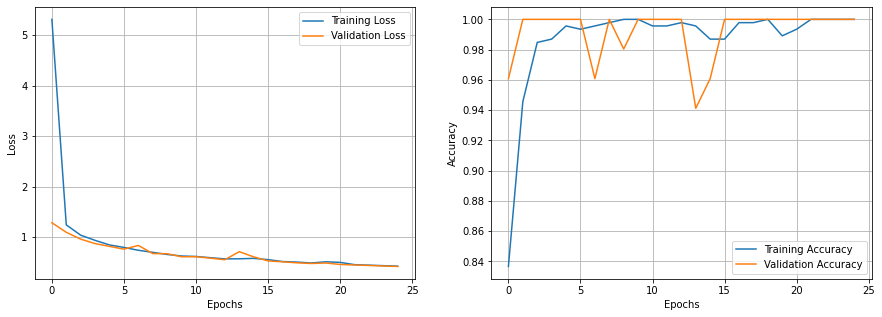

In [42]:
plt.figure(1, figsize = (15, 5))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( hist.history["loss"], label = "Training Loss")
plt.plot( hist.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( hist.history["accuracy"], label = "Training Accuracy")
plt.plot( hist.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()
plt.show()

In [44]:
test_images = "/content/drive/MyDrive/Colab Notebooks/chest_xray/chest_xray/test"

test_image_data = []
test_labels = []

test_folders = os.listdir(test_images)
print(test_folders)

label_dict = {
    'PNEUMONIA':0,
    'NORMAL':1
}

from keras.preprocessing import image

for ix in test_folders:
    path = os.path.join(test_images,ix)
    for im in os.listdir(path):
        img = image.load_img(os.path.join(path,im),target_size = ((224,224)))
        img_array = image.img_to_array(img)
        test_image_data.append(img_array)
        test_labels.append(label_dict[ix])
        

combined = list(zip(test_image_data,test_labels))
test_image_data[:],test_labels[:] = zip(*combined)

x_test = np.array(test_image_data)
y_test = np.array(test_labels)

from keras.utils import np_utils

y_test = np_utils.to_categorical(y_test)
print(x_test.shape,y_test.shape)

['PNEUMONIA', 'NORMAL']
(624, 224, 224, 3) (624, 2)


In [45]:
model.evaluate(x_test,y_test)

20/20 [==============================] - 8s 405ms/step - loss: 11.8324 - accuracy: 0.3622


[11.832366943359375, 0.3621794879436493]

In [46]:
from sklearn.metrics import classification_report,confusion_matrix

In [47]:
predictions = model.predict(x_test, batch_size = 32)
pred = np.argmax(predictions, axis=1)

In [48]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.39      0.04      0.07       390
           1       0.36      0.90      0.51       234

    accuracy                           0.36       624
   macro avg       0.38      0.47      0.29       624
weighted avg       0.38      0.36      0.24       624



In [54]:
import pandas as pd
cm = confusion_matrix(test_labels, pred)
cm_df = pd.DataFrame(cm,
                     index = ['0','1'], 
                     columns = ['0','1'])

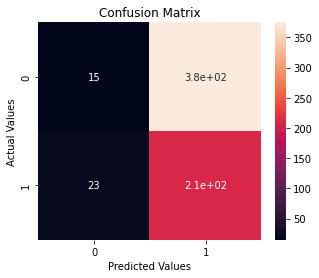

In [56]:

import seaborn as sns
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [52]:
print(confusion_matrix(test_labels, pred))

[[ 15 375]
 [ 23 211]]
